In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
file = "/content/drive/MyDrive/VisualAnalytics/Formatted2022FIFA.xlsx"

In [ ]:
df = pd.read_excel(file)

In [ ]:
df = df.dropna(axis=0, how="any")

In [ ]:
top = df.nlargest(1500, 'Overall')

In [ ]:
top = top.sort_values("Best Position")

In [ ]:
top.replace(["LB", "CB", "RB", "RWB", "LWB"], "DEF", inplace=True)
top.replace(["CAM", "CM", "CDM", "LM", "RM"], "MID", inplace=True)
top.replace(["LW", "RW", "CF", "ST"], "FWD", inplace=True)

In [ ]:
ruoli = ['GK', "DEF", "MID", "FWD"]

top["Best Position"] = pd.Categorical(top['Best Position'], ruoli)

In [ ]:
top = top.sort_values("Best Position")

In [ ]:
top["Best Position"].value_counts()

MID    646
DEF    457
FWD    251
GK     146
Name: Best Position, dtype: int64

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(ruoli)
le.transform(ruoli)


array([2, 0, 3, 1])

In [ ]:
from sklearn.preprocessing import StandardScaler

# features = ['Overall','Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Composure',
#        'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
#        'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
#        'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
#        'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
#        'Composure', 'StandingTackle', 'SlidingTackle', 'GKDiving',
#        'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Defensive Awareness']

features = ['Finishing', 'Penalties', 'HeadingAccuracy', 'ShotPower', 'FKAccuracy', 'Dribbling', 'BallControl']

x = top.loc[:, features].values
y = top.loc[:, ['Best Position']]



In [ ]:
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns=['pc1', 'pc2'])

In [ ]:
bestPdf = pd.DataFrame(data = top, columns = ['Name', 'Club', 'Best Position', 'Finishing', 'Penalties', 'HeadingAccuracy', 'ShotPower', 'FKAccuracy', 'Dribbling', 'BallControl'])

In [ ]:
bf_list = []
for idx, row in bestPdf.iterrows():
  bf_list.append([row['Name'], row['Club'], row['Best Position'], row["Finishing"], row["Penalties"], row["HeadingAccuracy"], row["ShotPower"], row["FKAccuracy"], row["Dribbling"], row["BallControl"]])
print(bf_list)

[['Álex Remiro', 'Real Sociedad', 'GK', 13.0, 24.0, 13.0, 60.0, 17.0, 19.0, 23.0], ['H. Lloris', 'Tottenham Hotspur', 'GK', 10.0, 40.0, 10.0, 49.0, 10.0, 10.0, 34.0], ['T. Vaclík', 'Olympiacos CFP', 'GK', 14.0, 13.0, 19.0, 56.0, 16.0, 14.0, 20.0], ['Adán', 'Sporting CP', 'GK', 11.0, 25.0, 23.0, 59.0, 12.0, 12.0, 15.0], ['J. Cillessen', 'Valencia CF', 'GK', 10.0, 21.0, 12.0, 59.0, 10.0, 12.0, 32.0], ['W. Szczęsny', 'Juventus', 'GK', 12.0, 18.0, 16.0, 55.0, 14.0, 11.0, 22.0], ['M. Dúbravka', 'Newcastle United', 'GK', 10.0, 20.0, 12.0, 60.0, 13.0, 19.0, 35.0], ['Aitor', 'Levante Unión Deportiva', 'GK', 12.0, 24.0, 20.0, 50.0, 14.0, 22.0, 14.0], ['H. Van Crombrugge', 'RSC Anderlecht', 'GK', 11.0, 26.0, 11.0, 56.0, 13.0, 29.0, 36.0], ['Nelsildo Reis', 'Ceará Sporting Club', 'GK', 20.0, 17.0, 18.0, 58.0, 20.0, 17.0, 23.0], ['L. Burián', 'Club Atlético Colón', 'GK', 15.0, 25.0, 12.0, 55.0, 15.0, 19.0, 38.0], ['T. Strakosha', 'Lazio', 'GK', 18.0, 21.0, 11.0, 56.0, 12.0, 14.0, 15.0], ['D. Subaš

In [ ]:
principalDf[['Name', 'Club', 'Best Position','Finishing', 'Penalties', 'HeadingAccuracy', 'ShotPower', 'FKAccuracy', 'Dribbling', 'BallControl']] = bf_list

In [ ]:
principalDf["Best Position"] = principalDf["Best Position"].astype('category')
principalDf['Position'] = principalDf["Best Position"].cat.codes

In [ ]:
del principalDf["Best Position"]

In [ ]:
principalDf = principalDf[['pc1', 'pc2', 'Name', 'Club', 'Position', 'Best Position', 'Finishing', 'Penalties', 'HeadingAccuracy', 'ShotPower', 'FKAccuracy', 'Dribbling', 'BallControl']]

In [ ]:
principalDf = principalDf.rename(columns={"Best Position": "BestPosition"})


In [ ]:
principalDf.to_csv("/content/drive/MyDrive/VisualAnalytics/pca_attaccanti_off2.csv", index=True)

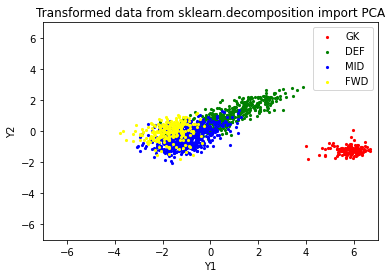

In [ ]:
s = 10
plt.scatter(principalComponents[0:146, 0], principalComponents[0:146, 1],
            color='red',s=s, lw=0, label='GK')

plt.scatter(principalComponents[146:603, 0], principalComponents[146:603, 1],
            color='green',s=s, lw=0, label='DEF')

plt.scatter(principalComponents[603:1249, 0], principalComponents[603:1249, 1],
            color='blue',s=s, lw=0, label='MID')

plt.scatter(principalComponents[1249:1500, 0], principalComponents[1249:1500, 1],
            color='yellow',s=s, lw=0, label='FWD')

# for i, txt in enumerate(top['Name']):
#   plt.annotate(txt, (principalComponents[i, 0], principalComponents[i, 1]))

plt.xlabel('Y1')
plt.ylabel('Y2')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.legend()
plt.title('Transformed data from sklearn.decomposition import PCA')

plt.show()